In [19]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [20]:
hdata = pd.read_csv(r"C:\Users\Admin\Heart_Failure_Prediction\heart.csv")

In [21]:
hdata.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
hdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [22]:
hdata.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [23]:
hdata.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [24]:
col = list(hdata.columns)
categorical_variables = []
numerical_Variables = []
for i in col:
    if len(hdata[i].unique()) > 6:
        numerical_Variables.append(i)
    else:
        categorical_variables.append(i)
print(f"Categorical  :{categorical_variables},\nNumber of Categorical Variable: {len(categorical_variables)} ")
print(f"Numerical  :{numerical_Variables},\nNumber of Numerical Variable: {len(numerical_Variables)} ")



Categorical  :['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease'],
Number of Categorical Variable: 7 
Numerical  :['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'],
Number of Numerical Variable: 5 


In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_cpy = hdata.copy(deep = True)

data_cpy['Sex'] = le.fit_transform(data_cpy['Sex'])
data_cpy['ChestPainType'] = le.fit_transform(data_cpy['ChestPainType'])
data_cpy['RestingECG'] = le.fit_transform(data_cpy['RestingECG'])
data_cpy['ExerciseAngina'] = le.fit_transform(data_cpy['ExerciseAngina'])
data_cpy['ST_Slope'] = le.fit_transform(data_cpy['ST_Slope'])

In [37]:
hdata['Sex'][1]

'F'

## EDA on Categorical Variable

In [26]:
sex = hdata[hdata['HeartDisease'] == 1]['Sex'].value_counts()
sex = [sex[0] / sum(sex) * 100, sex[1] / sum(sex) * 100]

cp = hdata[hdata['HeartDisease'] == 1]['ChestPainType'].value_counts()
cp = [cp[0] / sum(cp) * 100,cp[1] / sum(cp) * 100,cp[2] / sum(cp) * 100,cp[3] / sum(cp) * 100]

fbs = hdata[hdata['HeartDisease'] == 1]['FastingBS'].value_counts()
fbs = [fbs[0] / sum(fbs) * 100,fbs[1] / sum(fbs) * 100]

restecg = hdata[hdata['HeartDisease'] == 1]['RestingECG'].value_counts()
restecg = [restecg[0] / sum(restecg) * 100,restecg[1] / sum(restecg) * 100,restecg[2] / sum(restecg) * 100]

exang = hdata[hdata['HeartDisease'] == 1]['ExerciseAngina'].value_counts()
exang = [exang[0] / sum(exang) * 100,exang[1] / sum(exang) * 100]

slope = hdata[hdata['HeartDisease'] == 1]['ST_Slope'].value_counts()
slope = [slope[0] / sum(slope) * 100,slope[1] / sum(slope) * 100,slope[2] / sum(slope) * 100]

In [27]:
sex

[90.15748031496062, 9.84251968503937]

In [61]:
def pie_plot(xdata, label,Title,Explode):
    fig, ax = plt.subplots()
    ax.pie(xdata,labels=label,explode = Explode, autopct='%1.1f%%',
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True}, startangle=90)
    plt.title(Title)
    plt.show()

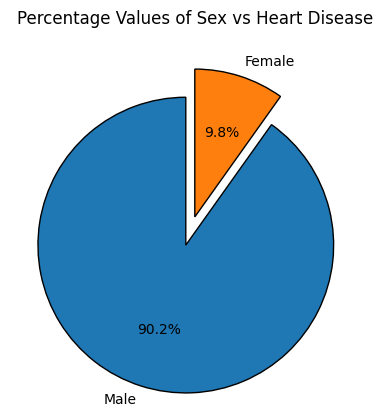

In [74]:
pie_plot(sex,['Male','Female'],Title='Percentage Values of Sex vs Heart Disease',Explode = (0.2,0))


Out of all the heart disease patients, a staggering 90% patients are male.

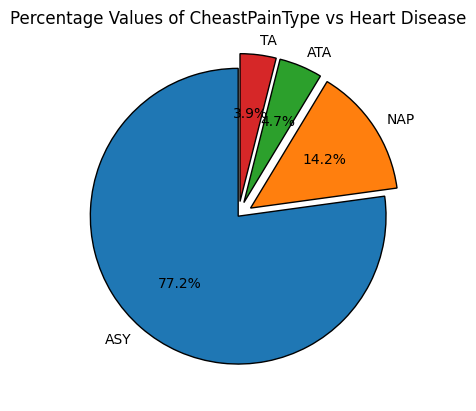

In [72]:
pie_plot(cp,['ASY', 'NAP', 'ATA', 'TA'],'Percentage Values of CheastPainType vs Heart Disease',(0,0.1,0.1,0.1))

When it comes to the type of chest pain, ASY type holds the majority with 77% that lead to heart diseases.

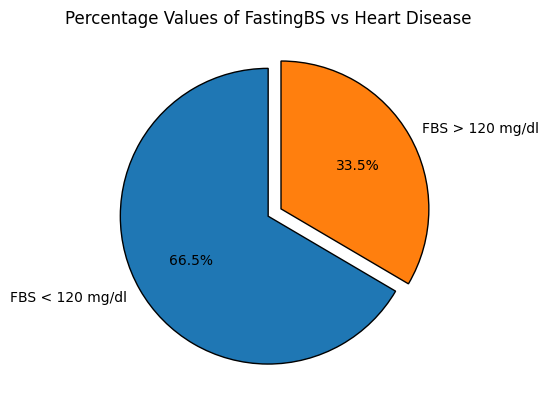

In [75]:
pie_plot(fbs,['FBS < 120 mg/dl','FBS > 120 mg/dl'],'Percentage Values of FastingBS vs Heart Disease',(0,0.1))

Fasting Blood Sugar level < 120 mg/dl displays high chances of heart diseases.

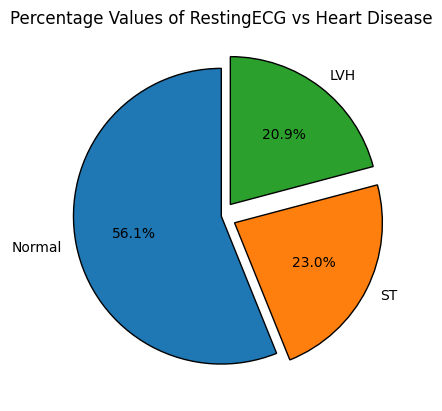

In [77]:
pie_plot(restecg,['Normal','ST','LVH'],'Percentage Values of RestingECG vs Heart Disease',(0,0.1,0.1))

For RestingECG, Normal level accounts for 56% chances of heart diseases than LVH and ST levels.

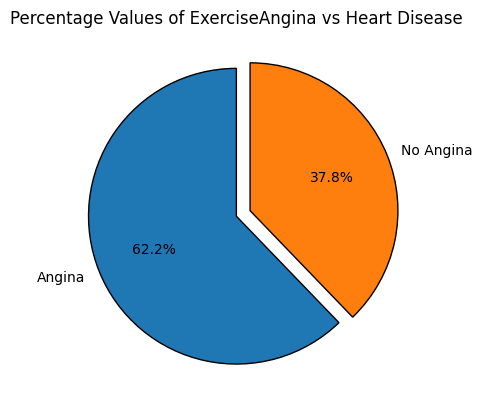

In [78]:
pie_plot(exang,['Angina','No Angina'],'Percentage Values of ExerciseAngina vs Heart Disease',(0,0.1))


Detection of Exercise Induced Angina also points towards heart diseases.

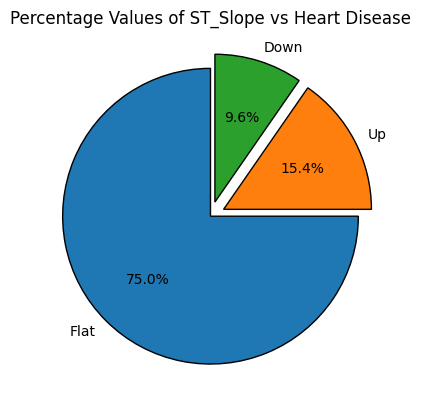

In [79]:
pie_plot(slope,['Flat','Up','Down'],'Percentage Values of ST_Slope vs Heart Disease',(0,0.1,0.1))


When it comes to ST_Slope readings, Flat level holds a massive chunk with 75% that may assist in detecting underlying heart problems.

## EDA On numerical variable

In [82]:
numerical_Variables

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [83]:
hdata['RestingBP_Group'] = [ int(i / 5) for i in hdata['RestingBP']]
hdata['Cholesterol_Group'] = [ int(i / 10) for i in hdata['Cholesterol']]
hdata['MaxHR_Group'] = [ int(i / 5) for i in hdata['MaxHR']]
hdata['Oldpeak_Group'] = [ int( (i*10) / 5) for i in hdata['Oldpeak']]

In [ ]:
def b_plot(data,X,Title,Figsize):
    fig, ax = plt.subplots(nrows = 1,ncols = 1,figsize = Figsize)
    plt.subplot(1,1,1)
    sns.countplot(data, x=X, hue="HeartDisease")
    plt.legend(['No Heart Disease', 'Heart Disease'])
    plt.title(Title);

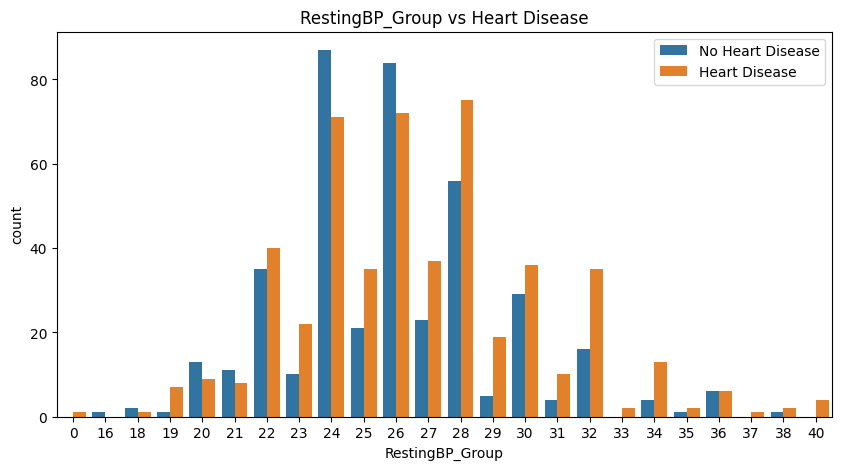

In [101]:
b_plot(hdata,hdata['RestingBP_Group'],'RestingBP_Group vs Heart Disease',(10,5))

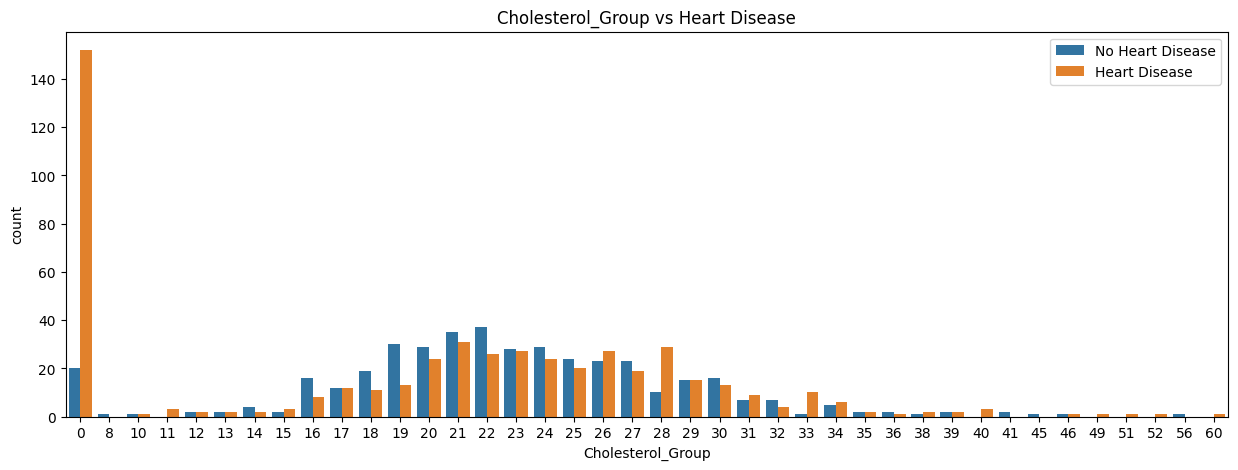

In [102]:
b_plot(hdata,hdata['Cholesterol_Group'],'Cholesterol_Group vs Heart Disease',(15,5))

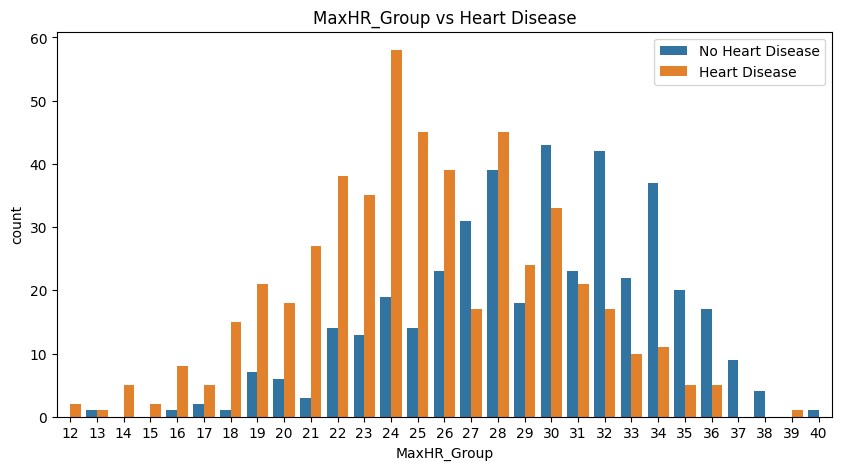

In [103]:
b_plot(hdata,hdata['MaxHR_Group'],'MaxHR_Group vs Heart Disease',(10,5))

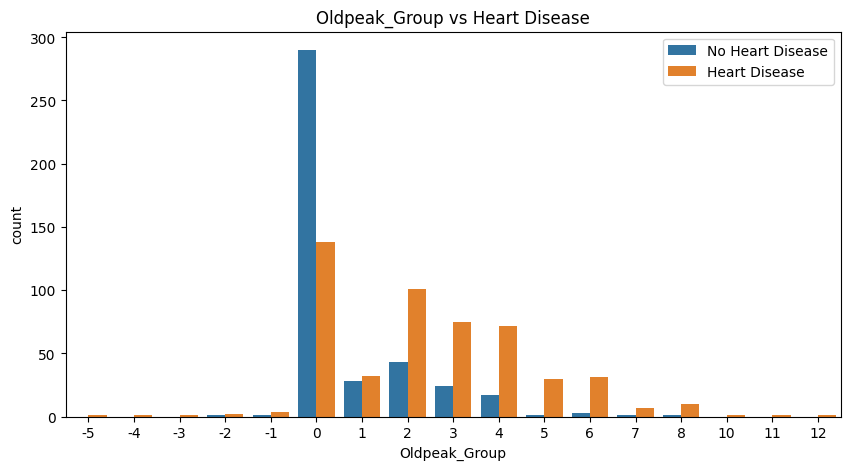

In [104]:
b_plot(hdata,hdata['Oldpeak_Group'],'Oldpeak_Group vs Heart Disease',(10,5))